In [75]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [76]:
ruta_absoluta = "C:\\Users\\fabio\\AppData\\Local\\Programs\\JN\\pruebas_saber_2023_scores.xlsx"
df = pd.read_excel(ruta_absoluta)

In [77]:
import numpy as np

In [78]:
df_n = df[[
    "MOD_LECTURA_CRITICA_PUNT",
    "MOD_COMPETEN_CIUDADA_PUNT",
    "MOD_INGLES_PUNT",
    "MOD_COMUNI_ESCRITA_PUNT",
    "PUNT_GLOBAL",
    "INST_NOMBRE_INSTITUCION"
]].copy()

df = None




In [79]:
print(df_n.head(10))

   MOD_LECTURA_CRITICA_PUNT  MOD_COMPETEN_CIUDADA_PUNT  MOD_INGLES_PUNT  \
0                       164                        157            152.0   
1                       132                        109            126.0   
2                       150                        134            142.0   
3                       141                        113            132.0   
4                       147                        146            173.0   
5                       131                        105            118.0   
6                       108                        103            129.0   
7                       162                         82            175.0   
8                       134                        107            125.0   
9                       144                        144            185.0   

   MOD_COMUNI_ESCRITA_PUNT  PUNT_GLOBAL  \
0                      130          148   
1                      138          120   
2                      149          146   
3 

In [80]:
df_n.groupby(["INST_NOMBRE_INSTITUCION"]).mean()

,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_COMUNI_ESCRITA_PUNT,PUNT_GLOBAL
INST_NOMBRE_INSTITUCION,,,,,
CENTRO DE EDUCACION MILITAR-BOGOTÁ D.C.,140.000000,89.000000,172.000000,158.000000,143.000000
COLEGIO DE ESTUDIOS SUPERIORES DE ADMINISTRACION-CESA-BOGOTÁ D.C.,187.285714,189.571429,213.285714,174.428571,188.142857
COLEGIO MAYOR DE ANTIOQUIA-MEDELLIN,142.661972,137.821596,145.258216,145.328638,142.394366
COLEGIO MAYOR DE NUESTRA SEÑORA DEL ROSARIO-BOGOTÁ D.C.,181.581901,181.940435,199.011455,162.762887,178.395189
COLEGIO MAYOR DEL CAUCA-POPAYAN,137.677596,128.234973,142.546448,144.786885,137.644809
CONSERVATORIO DEL TOLIMA-IBAGUE,162.666667,136.000000,157.333333,137.666667,150.000000
CORPORACION COLEGIATURA COLOMBIANA-MEDELLIN,137.967742,126.677419,179.064516,141.919355,143.419355
CORPORACION DE ESTUDIOS TECNOLOGICOS DEL NORTE DEL VALLE-CARTAGO,124.400000,108.360000,132.640000,135.120000,127.160000
CORPORACION ESCUELA DE ARTES Y LETRAS-BOGOTÁ D.C.,153.448980,141.500000,165.602041,145.989796,150.071429


In [81]:
lista_diccionarios = df_n.to_dict(orient='records')
  

In [82]:
resultados = {}
for entry in lista_diccionarios:
    inst = entry["INST_NOMBRE_INSTITUCION"]
    if inst not in resultados:
        resultados[inst] = {
            'MOD_LECTURA_CRITICA_PUNT': {'suma': 0, 'contador': 0},
            'MOD_COMPETEN_CIUDADA_PUNT': {'suma': 0, 'contador': 0},
            'MOD_INGLES_PUNT': {'suma': 0, 'contador': 0},
            'MOD_COMUNI_ESCRITA_PUNT': {'suma': 0, 'contador': 0},
            'PUNT_GLOBAL': {'suma': 0, 'contador': 0}
        }
    # Acumulación de sumas y conteo para promedio
    for key in ['MOD_LECTURA_CRITICA_PUNT', 'MOD_COMPETEN_CIUDADA_PUNT', 'MOD_INGLES_PUNT', 'MOD_COMUNI_ESCRITA_PUNT', 'PUNT_GLOBAL']:
        resultados[inst][key]['suma'] += entry[key]
        resultados[inst][key]['contador'] += 1


In [83]:
promedios = {}
for institucion, scores in resultados.items():
    promedios[institucion] = {}
    for materia, valores in scores.items():
        if valores['contador'] > 0:  # Evitar división por cero
            promedios[institucion][materia] = valores['suma'] / valores['contador']


In [84]:
promedios


{'FUNDACION UNIVERSITARIA-CEIPA-SABANETA': {'MOD_LECTURA_CRITICA_PUNT': 145.199649737303,
  'MOD_COMPETEN_CIUDADA_PUNT': 134.40280210157619,
  'MOD_INGLES_PUNT': 158.46409807355516,
  'MOD_COMUNI_ESCRITA_PUNT': 143.48861646234676,
  'PUNT_GLOBAL': 144.45183887915937},
 'UNIVERSIDAD SIMON BOLIVAR-BARRANQUILLA': {'MOD_LECTURA_CRITICA_PUNT': 143.2782012195122,
  'MOD_COMPETEN_CIUDADA_PUNT': 134.5967987804878,
  'MOD_INGLES_PUNT': nan,
  'MOD_COMUNI_ESCRITA_PUNT': 141.9969512195122,
  'PUNT_GLOBAL': 139.94588414634146},
 'CORPORACION UNIVERSITARIA REFORMADA - CUR -BARRANQUILLA': {'MOD_LECTURA_CRITICA_PUNT': 142.32298136645963,
  'MOD_COMPETEN_CIUDADA_PUNT': 128.16459627329192,
  'MOD_INGLES_PUNT': 147.58074534161491,
  'MOD_COMUNI_ESCRITA_PUNT': 139.55900621118013,
  'PUNT_GLOBAL': 137.0},
 'CORPORACION UNIVERSITARIA AMERICANA-BARRANQUILLA': {'MOD_LECTURA_CRITICA_PUNT': 135.7032590051458,
  'MOD_COMPETEN_CIUDADA_PUNT': 127.64408233276158,
  'MOD_INGLES_PUNT': nan,
  'MOD_COMUNI_ESCRITA_PUN

In [85]:
# Encabezado de la tabla
columnas = ['Institución', 'Lectura Crítica', 'Competencia Ciudadana', 'Inglés', 'Comunicación Escrita', 'Puntaje Global']
print("{:<50} {:>20} {:>20} {:>20} {:>20} {:>20}".format(*columnas))

# Iterar sobre cada institución y sus promedios calculados
for institucion, scores in promedios.items():
    # Preparar los datos para mostrar
    datos = [
        scores.get('MOD_LECTURA_CRITICA_PUNT', 0),
        scores.get('MOD_COMPETEN_CIUDADA_PUNT', 0),
        scores.get('MOD_INGLES_PUNT', 0),
        scores.get('MOD_COMUNI_ESCRITA_PUNT', 0),
        scores.get('PUNT_GLOBAL', 0)
    ]
    # Formatear cada fila de la tabla
    print("{:<50} {:>20.2f} {:>20.2f} {:>20.2f} {:>20.2f} {:>20.2f}".format(institucion, *datos))


Institución                                             Lectura Crítica Competencia Ciudadana               Inglés Comunicación Escrita       Puntaje Global
FUNDACION UNIVERSITARIA-CEIPA-SABANETA                           145.20               134.40               158.46               143.49               144.45
UNIVERSIDAD SIMON BOLIVAR-BARRANQUILLA                           143.28               134.60                  nan               142.00               139.95
CORPORACION UNIVERSITARIA REFORMADA - CUR -BARRANQUILLA               142.32               128.16               147.58               139.56               137.00
CORPORACION UNIVERSITARIA AMERICANA-BARRANQUILLA                 135.70               127.64                  nan               139.20               133.32
CORPORACION UNIVERSIDAD DE LA COSTA, CUC-BARRANQUILLA               145.96               136.20                  nan               143.81               144.98
UNIVERSIDAD LIBRE-BARRANQUILLA                         

In [86]:
 from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_num = df_n[['MOD_LECTURA_CRITICA_PUNT',
'MOD_COMPETEN_CIUDADA_PUNT',
'MOD_INGLES_PUNT',
'MOD_COMUNI_ESCRITA_PUNT',
'PUNT_GLOBAL']]

df_num['MOD_INGLES_PUNT'] = df_num['MOD_INGLES_PUNT'].fillna(df_num['MOD_INGLES_PUNT'].mean())
normalized_df = scaler.fit_transform(df_num)



C:\Users\fabio\AppData\Local\Temp\ipykernel_5676\2456355515.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['MOD_INGLES_PUNT'] = df_num['MOD_INGLES_PUNT'].fillna(df_num['MOD_INGLES_PUNT'].mean())


In [87]:
normalized_df.shape


(139288, 5)

In [88]:
import numpy as np

class KMeansNorm1:
    def __init__(self, k, max_iter=100):
        self.k = k
        self.max_iter = max_iter

    def fit(self, X):
        centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]
        for _ in range(self.max_iter):
            distances = np.sum(np.abs(X[:, np.newaxis, :] - centroids), axis=2)  # Calcula las distancias
            labels = np.argmin(distances, axis=1)  # Asigna etiquetas basadas en las distancias
            new_centroids = np.array([np.mean(X[labels == i], axis=0) for i in range(self.k)])  # Calcula nuevos centroides
            if np.allclose(centroids, new_centroids):
                break
            centroids = new_centroids
        self.centroids = centroids
        self.labels = labels

    def predict(self, X, return_distances=False):
        distances = np.sum(np.abs(X[:, np.newaxis, :] - self.centroids), axis=2)
        if return_distances:
            return np.argmin(distances, axis=1), distances.min(axis=1)
        return np.argmin(distances, axis=1)

# Genera un array de ejemplo
np.random.seed(42)
X = normalized_df
# Crea una instancia de KMeansNorm1 y ajusta los datos
kmeans = KMeansNorm1(k=5)
kmeans.fit(X)

# Muestra los centroides y la clasificación de puntos
print("Centroides finales:")
print(kmeans.centroids)
print("Clasificación de puntos:")
nclusters, distancecluster = kmeans.predict(X, return_distances=True)
print (nclusters)
print ( distancecluster)


Centroides finales:
[[0.48184325 0.45179049 0.48095291 0.37720067 0.51615842]
 [0.62089926 0.60928587 0.63837222 0.53313333 0.68439362]
 [0.36037457 0.32894752 0.40076156 0.36857129 0.42160264]
 [0.4187577  0.37952652 0.45615951 0.51622481 0.50539726]
 [0.52884191 0.50098801 0.52333694 0.51711042 0.59101188]]
Clasificación de puntos:
[4 3 4 ... 2 2 3]
[0.1645795  0.17544695 0.18523553 ... 0.15546161 0.30765863 0.35785065]


In [89]:
X.shape

(139288, 5)

In [90]:

type(kmeans.centroids)

numpy.ndarray

In [91]:
#desnormalizamos las variables
scaler.inverse_transform(kmeans.centroids)

#punto 3  1 valores del centroide 

array([[144.55297616, 135.53714806, 144.28587411, 113.16019953,
        134.71734855],
       [186.26977688, 182.78576065, 191.51166583, 159.94      ,
        178.62673428],
       [108.11237021,  98.68425519, 120.22846681, 110.57138578,
        110.03828874],
       [125.62731144, 113.85795536, 136.84785339, 154.86744405,
        131.90868559],
       [158.65257429, 150.29640425, 157.00108179, 155.13312526,
        154.25410132]])

In [92]:
nclusters, distancecluster = kmeans.predict(X, return_distances=True)
df_n['cluster'] = nclusters
df_n['distanciace_cluster'] = distancecluster
df_n



,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_COMUNI_ESCRITA_PUNT,PUNT_GLOBAL,INST_NOMBRE_INSTITUCION,cluster,distanciace_cluster
0,164,157,152.0,130,148,FUNDACION UNIVERSITARIA-CEIPA-SABANETA,4,0.164580
1,132,109,126.0,138,120,UNIVERSIDAD SIMON BOLIVAR-BARRANQUILLA,3,0.175447
2,150,134,142.0,149,146,UNIVERSIDAD SIMON BOLIVAR-BARRANQUILLA,4,0.185236
3,141,113,132.0,159,136,UNIVERSIDAD SIMON BOLIVAR-BARRANQUILLA,3,0.099712
4,147,146,173.0,171,155,UNIVERSIDAD SIMON BOLIVAR-BARRANQUILLA,4,0.162240
...,...,...,...,...,...,...,...,...
139283,131,151,142.0,120,133,CORPORACION UNIFICADA NACIONAL DE EDUCACION SU...,0,0.133718
139284,146,108,120.0,171,134,CORPORACION UNIFICADA NACIONAL DE EDUCACION SU...,3,0.205383
139285,93,91,136.0,114,106,UNIVERSIDAD ECCI-BOGOTÁ D.C.,2,0.155462
139286,91,97,161.0,133,119,UNIVERSIDAD ECCI-BOGOTÁ D.C.,2,0.307659


In [93]:
df_n.columns

Index(['MOD_LECTURA_CRITICA_PUNT', 'MOD_COMPETEN_CIUDADA_PUNT',
       'MOD_INGLES_PUNT', 'MOD_COMUNI_ESCRITA_PUNT', 'PUNT_GLOBAL',
       'INST_NOMBRE_INSTITUCION', 'cluster', 'distanciace_cluster'],
      dtype='object')

In [94]:
Punto 1. 1era y 2da institucion  

# Suponiendo que tienes tu dataset cargado en un DataFrame llamado df

# Agrupar por cluster y encontrar los dos valores más pequeños de distanciace_cluster
top_values = df_n.groupby('cluster').apply(lambda x: x.nsmallest(2, 'distanciace_cluster'))

# Seleccionar solo las columnas necesarias
result = top_values[['INST_NOMBRE_INSTITUCION', 'distanciace_cluster']]

# Mostrar el resultado
result

SyntaxError: invalid decimal literal (371799051.py, line 1)

In [ ]:
!pip install seaborn

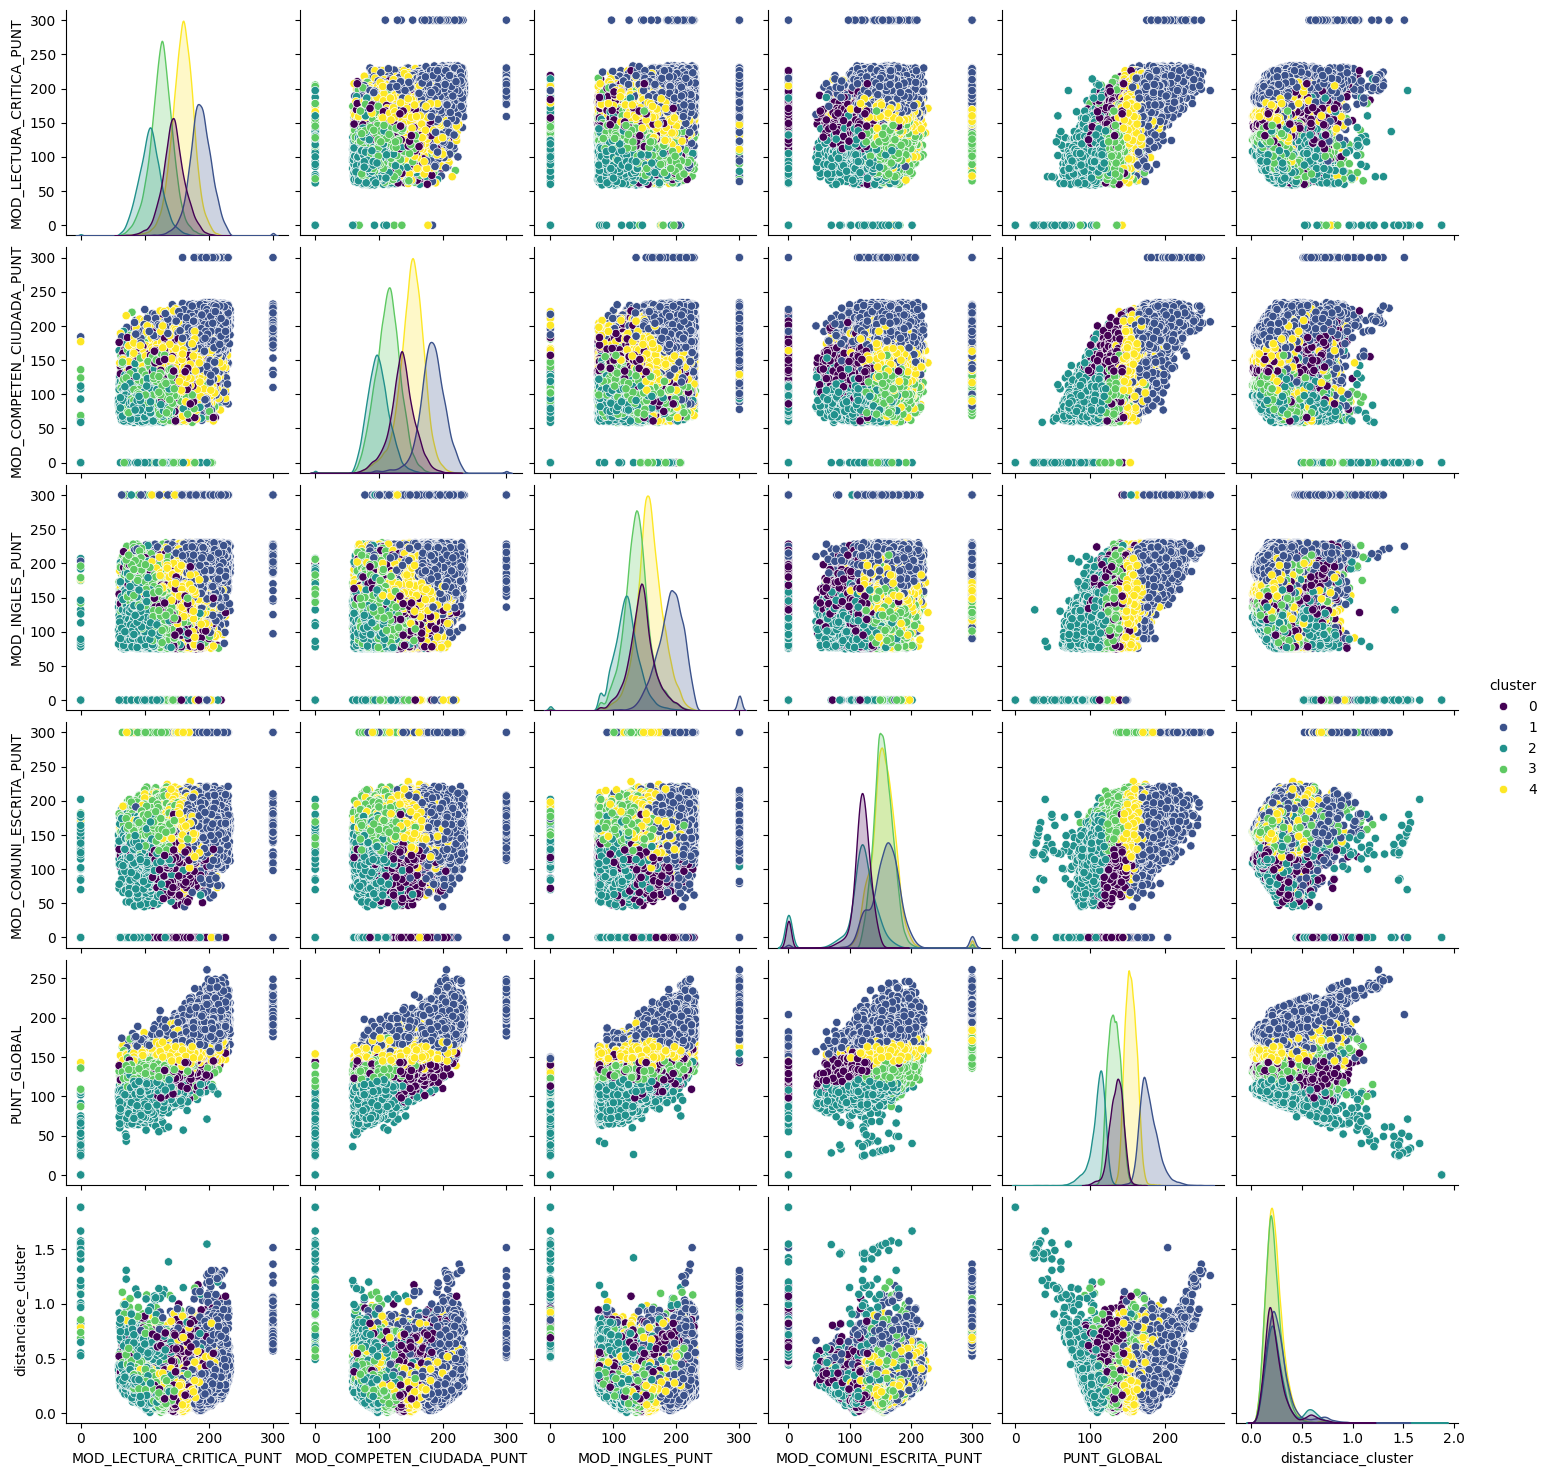

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df_n, hue='cluster', palette='viridis')
plt.show()

In [ ]:
import seaborn as sns


def plot_pairplot_per_cluster(df, cluster_column):
    # Obtener la lista de clusters únicos
    clusters = df[cluster_column].unique()

    # Iterar sobre cada cluster y generar el pairplot y estadísticas descriptivas
    for cluster in clusters:
        cluster_data = df[df[cluster_column] == cluster]
        
        # Pairplot por cluster
        sns.pairplot(cluster_data, diag_kind='kde', hue=cluster_column, palette='viridis')
        plt.suptitle(f'Cluster {cluster}', y=1.02)
        plt.show()
        
        # Gráfico de violín por cluster
        plt.figure(figsize=(8, 6))
        sns.violinplot(data=cluster_data.drop(columns=[cluster_column]), palette='viridis')
        plt.title(f'Violin Plot - Cluster {cluster}')
        plt.xlabel('Features')
        plt.ylabel('Values')
        plt.xticks(rotation=45)
        plt.show()

        # Estadísticas descriptivas por cluster
        descriptive_stats = cluster_data.drop(columns=[cluster_column]).describe()
        print(f"\nEstadísticas descriptivas para Cluster {cluster}:")
        print(descriptive_stats)

# Ejemplo de uso con un DataFrame df y la columna 'Cluster'
# Suponiendo que df contiene al menos las columnas 'Feature 1', 'Feature 2' y 'Cluster'
plot_pairplot_per_cluster(df_n , 'cluster')

In [ ]:
df_n['cluster'].unique()